In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
sns.set()

## Importing data using pandas read csv

In [3]:
df = pd.read_csv('API_SP.POP.TOTL_DS2_en_csv_v2_103676.csv', skiprows=4)

In [4]:
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 63
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101669.0,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,...,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,...,23356246.0,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,84449.0,83747.0,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0,NaN


In [5]:
len(df.columns)

64

## Removing last unused column

In [6]:
df=df.iloc[:,:63]

In [7]:
# checking columns
df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018'],
      dtype='object')

## Now that data is cleaned, we can plot acquire data of India

In [8]:
df_india = df[df['Country Name']=='India']

In [9]:
df_india.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
107,India,IND,"Population, total",SP.POP.TOTL,450547679.0,459642165.0,469077190.0,478825608.0,488848135.0,499123324.0,...,1.217726e+09,1.234281e+09,1.250289e+09,1.265783e+09,1.280846e+09,1.295604e+09,1.310152e+09,1.324510e+09,1.338659e+09,1.352617e+09


## In above lines, we acquired Indian population row, we have to drop unnecessary columns
## Drop Country Name, Country Code, Indicator Name, Indicator Code since we know that this data is for population and India only

In [10]:
df_india=df_india.drop(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], axis=1)

In [11]:
df_india.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
107,450547679.0,459642165.0,469077190.0,478825608.0,488848135.0,499123324.0,509631500.0,520400576.0,531513824.0,543084336.0,...,1.217726e+09,1.234281e+09,1.250289e+09,1.265783e+09,1.280846e+09,1.295604e+09,1.310152e+09,1.324510e+09,1.338659e+09,1.352617e+09


## Now melt the dataframe result for India, flip the single row with columns into multiple rows

In [19]:
df_india_flipped = df_india.melt(value_vars=df_india.columns.tolist(), var_name='Year', value_name='Population')

## df.melt is used to flip data, value_vars is data to be used as values, where column becomes key and value of columns becomes value, var_name is name of variable, value_name is name of variable's value column

In [20]:
df_india_flipped.head()

,Year,Population
0,1960,450547679.0
1,1961,459642165.0
2,1962,469077190.0
3,1963,478825608.0
4,1964,488848135.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026944217390>]],
      dtype=object)

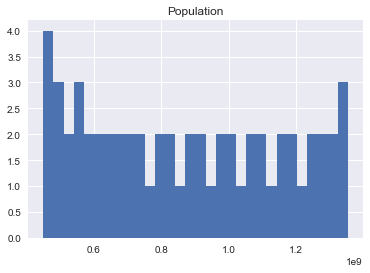

In [23]:
# to find distribution of population
df_india_flipped.hist(bins=30)

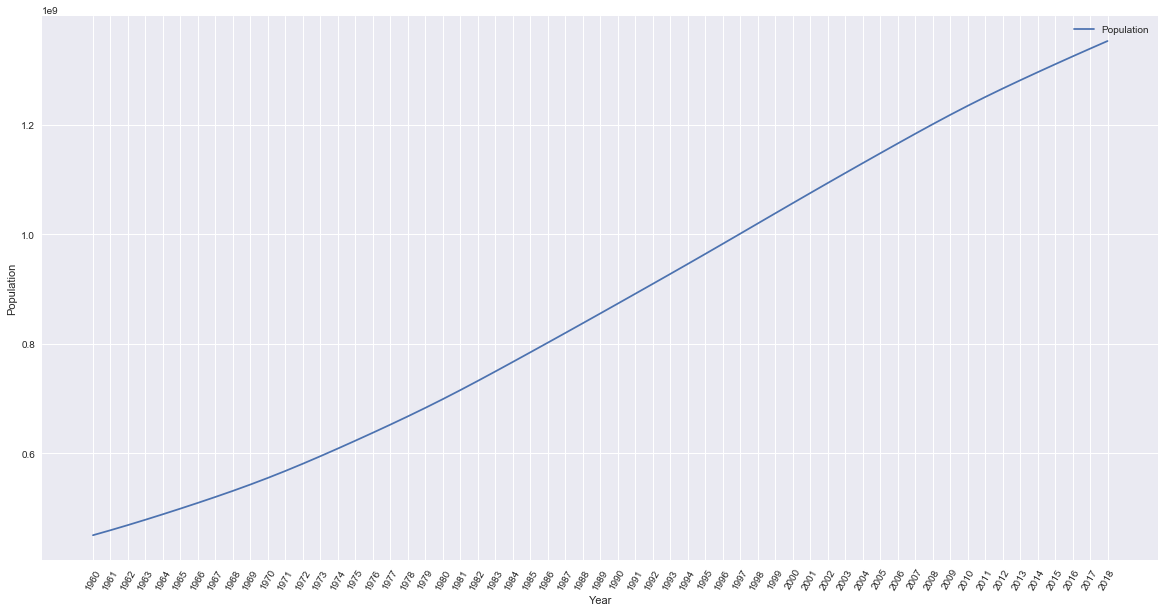

In [58]:
axes1= df_india_flipped.plot(figsize=(20, 10))
_=axes1.set_xlabel('Year')
_=axes1.set_ylabel('Population')
_=axes1.set_xticks(df_india_flipped.index)
_=axes1.set_xticklabels(df_india_flipped.Year, rotation=60)

In [59]:
n=len(df_india_flipped.Population)
x, y=np.sort(df_india_flipped.Population), np.arange(1, n+1)/n

In [60]:
print(x, y)

[4.50547679e+08 4.59642165e+08 4.69077190e+08 4.78825608e+08
 4.88848135e+08 4.99123324e+08 5.09631500e+08 5.20400576e+08
 5.31513824e+08 5.43084336e+08 5.55189792e+08 5.67868018e+08
 5.81087256e+08 5.94770134e+08 6.08802600e+08 6.23102897e+08
 6.37630087e+08 6.52408776e+08 6.67499806e+08 6.82995354e+08
 6.98952844e+08 7.15384993e+08 7.32239504e+08 7.49428958e+08
 7.66833410e+08 7.84360008e+08 8.01975244e+08 8.19682102e+08
 8.37468930e+08 8.55334678e+08 8.73277798e+08 8.91273209e+08
 9.09307016e+08 9.27403860e+08 9.45601831e+08 9.63922588e+08
 9.82365243e+08 1.00090003e+09 1.01948358e+09 1.03805816e+09
 1.05657555e+09 1.07500008e+09 1.09331719e+09 1.11152314e+09
 1.12962346e+09 1.14760993e+09 1.16548629e+09 1.18320947e+09
 1.20066976e+09 1.21772622e+09 1.23428117e+09 1.25028873e+09
 1.26578279e+09 1.28084613e+09 1.29560418e+09 1.31015240e+09
 1.32450959e+09 1.33865884e+09 1.35261733e+09] [0.01694915 0.03389831 0.05084746 0.06779661 0.08474576 0.10169492
 0.11864407 0.13559322 0.1525423

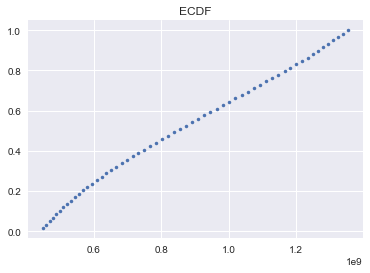

In [62]:
plt.plot(x, y, marker='.', linestyle='none')
plt.title('ECDF')
plt.show()